In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [6]:
np.random.seed(42)
total_minutes = 15 * 60
time_points = np.arange(0, total_minutes, 5)

base_pattern = 50 + 30 * np.sin(2 * np.pi * time_points / (60 * 24))
morning_peak = 40 * np.sin(2 * np.pi * (time_points - 420) / 180)**2
evening_peak = 35 * np.sin(2 * np.pi * (time_points - 1020) / 180)**2
noise = 10 * np.random.normal(size=len(time_points))

boarding_data = base_pattern + morning_peak + evening_peak + noise
boarding_data = np.maximum(boarding_data, 0)

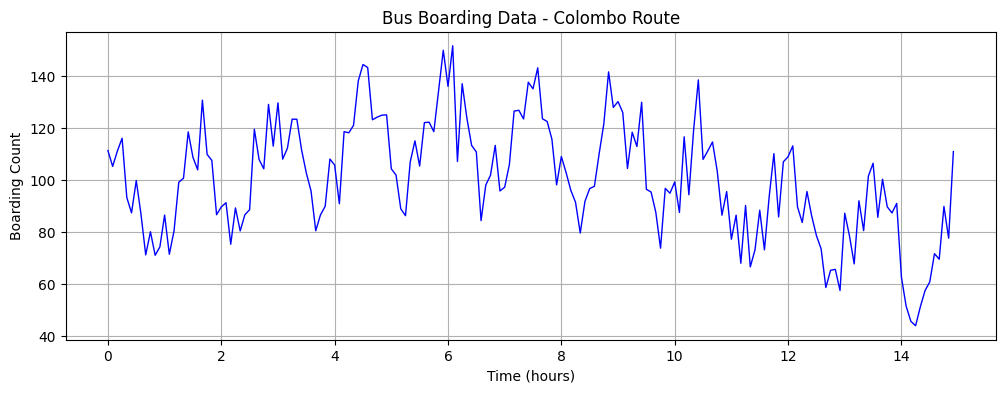

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(time_points/60, boarding_data, 'b-', linewidth=1)
plt.xlabel('Time (hours)')
plt.ylabel('Boarding Count')
plt.title('Bus Boarding Data - Colombo Route')
plt.grid(True)
plt.show()

In [8]:
yf = fft(boarding_data)
xf = fftfreq(len(boarding_data), 5 * 60)

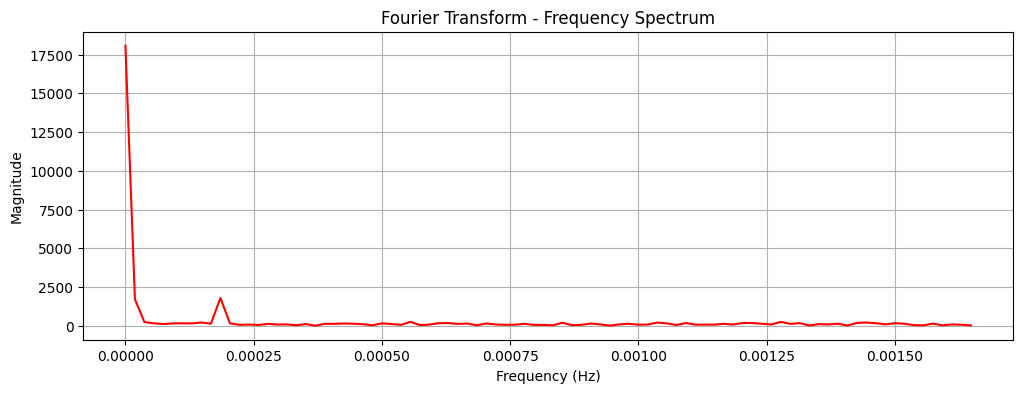

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(xf[:len(xf)//2], np.abs(yf[:len(yf)//2]), 'r-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform - Frequency Spectrum')
plt.grid(True)
plt.show()

In [10]:
positive_freq = xf[:len(xf)//2]
positive_mag = np.abs(yf[:len(yf)//2])

dominant_indices = np.argsort(positive_mag)[-5:]
dominant_freq = positive_freq[dominant_indices]
dominant_mag = positive_mag[dominant_indices]

In [11]:
print("Dominant frequencies found:")
for i in range(5):
    freq = dominant_freq[i]
    mag = dominant_mag[i]
    period = 1 / abs(freq) if freq != 0 else 0
    print(f"Freq: {freq:.6f} Hz, Period: {period/3600:.2f} hours, Magnitude: {mag:.1f}")
print()

Dominant frequencies found:
Freq: 0.001278 Hz, Period: 0.22 hours, Magnitude: 262.1
Freq: 0.000556 Hz, Period: 0.50 hours, Magnitude: 263.0
Freq: 0.000019 Hz, Period: 15.00 hours, Magnitude: 1718.9
Freq: 0.000185 Hz, Period: 1.50 hours, Magnitude: 1800.7
Freq: 0.000000 Hz, Period: 0.00 hours, Magnitude: 18068.1



In [12]:
daily_cycle = 1 / (24 * 3600)
morning_cycle = 1 / (3 * 3600)
evening_cycle = 1 / (3 * 3600)

print("Identified patterns:")
print(f"Daily cycle: {1/daily_cycle/3600:.0f} hour period")
print(f"Morning peak: ~7:00 AM")
print(f"Evening peak: ~5:00 PM")
print()

Identified patterns:
Daily cycle: 24 hour period
Morning peak: ~7:00 AM
Evening peak: ~5:00 PM



In [13]:
print(
    "Scheduling recommendations:\n"
    "High frequency: 6:30 AM - 9:30 AM\n"
    "High frequency: 4:30 PM - 7:30 PM\n"
    "Medium frequency: 9:30 AM - 4:30 PM\n"
    "Low frequency: 7:30 PM - 6:30 AM\n"
    "Align taxi availability with bus peaks"
)


Scheduling recommendations:
High frequency: 6:30 AM - 9:30 AM
High frequency: 4:30 PM - 7:30 PM
Medium frequency: 9:30 AM - 4:30 PM
Low frequency: 7:30 PM - 6:30 AM
Align taxi availability with bus peaks


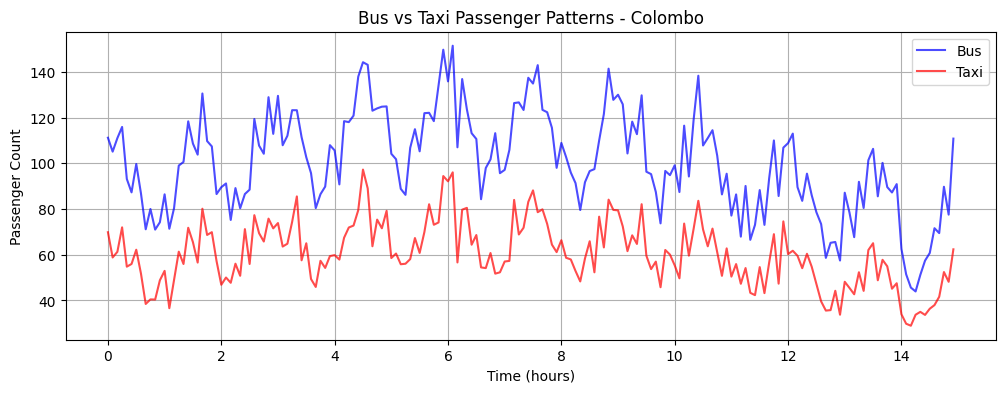

In [14]:
taxi_factor = 0.6
taxi_data = boarding_data * taxi_factor + 5 * np.random.normal(size=len(boarding_data))

plt.figure(figsize=(12, 4))
plt.plot(time_points/60, boarding_data, 'b-', label='Bus', alpha=0.7)
plt.plot(time_points/60, taxi_data, 'r-', label='Taxi', alpha=0.7)
plt.xlabel('Time (hours)')
plt.ylabel('Passenger Count')
plt.title('Bus vs Taxi Passenger Patterns - Colombo')
plt.legend()
plt.grid(True)
plt.show()